# Library

In [ ]:
! pip install torch
! pip install python-docx
! pip install openpyxl
! pip install numpy pandas torch
! pip install pydbn
! pip install MiniSom
! pip install pytorch-tabnet
! pip install scikit-learn
! pip install -U pyloras
! pip install imbalanced-learn
! pip install -U imbalanced-learn
! pip install smote_variants==0.5.1
! pip install smote-variants
! pip install keras
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 1.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pydbn (from versions: none)
ERROR: No matching distribution found for pydbn
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=560bec9b64095dd39e8fa602b29b97e2110dcf8394dc7e9358aed2d54b761d2e
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 4.6 MB/s eta 0:00:00
  Preparing m

In [ ]:
import numpy as np
import pandas as pd
import docx
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
start = time.time()
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers
from keras import layers, models
from keras.layers import Dense, Dropout, BatchNormalization, Activation, GRU, Conv1D, MaxPooling1D, Flatten
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Conv1D, AveragePooling1D, Flatten, Dense, concatenate
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
from openpyxl import load_workbook
from docx import Document
from collections import Counter
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import DenseNet121
from sklearn.model_selection import RepeatedStratifiedKFold

# Diabetes Patient Readmitted Prediction

### Introduction
The goal of this project is to develop a pattern recognition system that operates on a
given real-world dataset.

### Dataset
Our dataset is: Diabetes 130-US hospitals for years 1999-2008 Data Set.

Source: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

The last attribute is our target, indicating the days to inpatient
readmission:
* “<30” if the patient was readmitted in less than 30 days
* “>30” if the patient was readmitted in more than 30 days
* “No” for no record of readmission.

This problem is then a 3-class classification problem.

### Libraries Import

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# df.loc[df.readmitted==">30","readmitted"]= 1
# df.loc[df.readmitted=="<30","readmitted"]= 1
# df.loc[df.readmitted=="NO","readmitted"]= 0

# df['readmitted']=df['readmitted'].replace(['NO','>30','<30'],['0','0','1'])
# df['readmitted']=df['readmitted'].astype('int')

### Data Description

##### Data Header

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


##### Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

* 101766 data points (examples)
* 50 features, the last one `readmitted` is our target
* There are some missing data, but `df.info()` does not show them
* The features are either integer ot object (string) type.  

##### Statistical Analysis

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##### Missing Data Points

In [ ]:
# sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [ ]:
#names of all features
print(list(df))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


It looks like our dataset does not store null values as `Nan`, and uses some other characters to refere to different missing values. A full description of each feature in the dataset, and the percentage of missing values can be found on the following links:
* Features description & missing data percentages: https://www.hindawi.com/journals/bmri/2014/781670/tab1/
* Values of the primary diagnosis: https://www.hindawi.com/journals/bmri/2014/781670/tab2/
* Distribution of variable values: https://www.hindawi.com/journals/bmri/2014/781670/tab3/

Later, we will use `df.feature_name.unique()` & `df.groupby(['feature_name']).count()` to further examine the features which have missing datapoints.

Notice that in the data secription it is mentioned that there are ~70,000 data points, while there is ~100,000 in our dataset, which means there are some duplicate records that need to be fixed.

#### Data Cleaning

##### Remove Duplicate Data Points

There are 101,766 data points in the dataset, some of them are doublicates. We will use `patient_nbr` column as a reference, since it is a unique number given to each unique patient.

In [ ]:
#df.groupby(['patient_nbr']).count()
df['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

There is only 71,518 unique patient records out of 101,766 in the dataset.

In [ ]:
# duplicate_values = df[df.duplicated(subset='patient_nbr', keep=False)]

# # Printing the duplicate values
# print("Duplicate values based on the 'patient_nbr' column:")
# print(duplicate_values)

In [ ]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications      

Now we only have 71518 rows in our dataset.  

##### Remove Uninformative Features

the uninformative features in the dataset (21 in total) were discarded as shown in the table below, due to either, a huge amount of missing sample values (>50%), or due to the fact that somefeatures are not relevant to classify the data towards our target (Like patient ID), or if the feature is compeletly unbalanced (>95% of data points have the same value for the feature).

Feature|Discarding Reasons
---|---
incounter_id|Irrelevant to our target (readmitted)
Patient_nbr|Irrelevant to our target (readmitted)
Weight|97% of samples are missing
Payer_code|Irrelevant to our target (readmitted)
Medical_speciality|53% of samples are missing
Repaglinide|>100K samples not using the drug
Nateglinide|>100K samples not using the drug
Chlorpropamide|>100K samples not using the drug
Acarbose|>100K samples not using the drug
Miglitol|>100K samples not using the drug
Troglitazone|Only 3 patients using the drug
Tolazamide|Only 39 patients using the drug
Examide|All patients not using the drug
Citoglipton|All patients not using the drug
Glyburide_metformin|>100K samples not using the drug
Glipizide_metfotmin|Only 13 patients using the drug
Glimepiride_pioglitazone|Only 1 patient using the drug
Metformin_rosiglitazone|Only 2 patients using the drug
Metformin_pioglitazone|Only 1 patient using the drug
Acetohexamide|Only 1 patient using the drug
tolbutamide|Only 23 patients using the drug

In [ ]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [ ]:
df.drop(features_drop_list, axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   num_lab_procedures        71518 non-null  int64 
 8   num_procedures            71518 non-null  int64 
 9   num_medications           71518 non-null  int64 
 10  number_outpatient         71518 non-null  int64 
 11  number_emergency          71518 non-null  int64 
 12  number_inpatient          71518 non-null  int64 
 13  diag_1                    71518 non-null  object
 14  diag_2               

##### Diag Features Fix

Diag features indicate the diagnoses of the cause of the patien's health problem.

* diag_1: First diagnose
* diag_2: Second diagnose
* diag_3: Third diagnose

They are coded in ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes), resulting in hundreds of distinct categories. One way to simplify this, is by grouping every ICD-9 code value into one of 18 generic health problems, depending on the first 3 digits as following:   

   * List of ICD-9 codes 001–139: infectious and parasitic diseases
   * List of ICD-9 codes 140–239: neoplasms
   * List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
   * List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
   * List of ICD-9 codes 290–319: mental disorders
   * List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
   * List of ICD-9 codes 390–459: diseases of the circulatory system
   * List of ICD-9 codes 460–519: diseases of the respiratory system
   * List of ICD-9 codes 520–579: diseases of the digestive system
   * List of ICD-9 codes 580–629: diseases of the genitourinary system
   * List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
   * List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
   * List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
   * List of ICD-9 codes 740–759: congenital anomalies
   * List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
   * List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
   * List of ICD-9 codes 800–999: injury and poisoning
   * List of ICD-9 codes E and V codes: external causes of injury and supplemental classification
   
   After that we will fill the missing values with E and V codes

In [ ]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)


In [ ]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17
df['diag_1'].loc[(df['diag_1']==-1)] = 0

df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17
df['diag_2'].loc[(df['diag_2']==-1)] = 0

df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17
df['diag_3'].loc[(df['diag_3']==-1)] = 0

<ipython-input-19-324d3de206fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
<ipython-input-19-324d3de206fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
<ipython-input-19-324d3de206fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
<ipyth

In [ ]:
#check the results
df.diag_1.unique()

array([ 3., 11.,  1.,  2.,  7.,  8., 17., 12., 13.,  9.,  0., 16., 10.,
        5.,  6.,  4., 14.])

##### Race Feature Fix

Here we will replace the missing data points values with 'Other' category, as most likely people who skip filling their race have done that because they couldn't find their race listed within the options.

In [ ]:
df['race'] = df['race'].replace('?', 'Other')

In [ ]:
df.race.value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64

##### Gender Feature Fix

In [ ]:
df.gender.value_counts()

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

Here we have just 3 values that are Invalid, as a result we will change them into `Female`, which is the mod for this feature.

In [ ]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

Female    38028
Male      33490
Name: gender, dtype: int64

Now we can easliy change Male/Female into 1/0

In [ ]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df.gender.value_counts()

0    38028
1    33490
Name: gender, dtype: int64

##### Age Feature Fix

For age, we have 10 categories, each represents 10 years range from [0-10] to [90-100]. We will replace those with the middle age for each age range:
for example (0,10] will be repleased with 5; (60, 70] will be replaces by 65; and so on.

In [ ]:
df.age.value_counts()

[70-80)     18210
[60-70)     15960
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: age, dtype: int64

In [ ]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
df['age'].value_counts()

75    18210
65    15960
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: age, dtype: int64

##### max_glue_serum Feature Fix

We want to make the following changes:

|Raw Values|New Values|
|---|---|
|non|0
|norm|1
|>200|2
|>300|3

In [ ]:
df.max_glu_serum.value_counts()

None    68062
Norm     1731
>200      969
>300      756
Name: max_glu_serum, dtype: int64

In [ ]:
df['max_glu_serum']=df['max_glu_serum'].replace("None", 0)
df['max_glu_serum']=df['max_glu_serum'].replace("Norm", 1)
df['max_glu_serum']=df['max_glu_serum'].replace(">200", 2)
df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)
df.max_glu_serum.value_counts()

0    68062
1     1731
2      969
3      756
Name: max_glu_serum, dtype: int64

##### A1Cresult Feature Fix

We want to make the following changes:

|Raw Values|New Values|
|---|---|
|None|0
|Norm|1
|>7|2
|>8|3

In [ ]:
df.A1Cresult.value_counts()

None    58532
>8       6304
Norm     3791
>7       2891
Name: A1Cresult, dtype: int64

In [ ]:
df['A1Cresult']=df['A1Cresult'].replace("None", 0)
df['A1Cresult']=df['A1Cresult'].replace("Norm", 1)
df['A1Cresult']=df['A1Cresult'].replace(">7", 2)
df['A1Cresult']=df['A1Cresult'].replace(">8", 3)

In [ ]:
df.A1Cresult.value_counts()

0    58532
3     6304
1     3791
2     2891
Name: A1Cresult, dtype: int64

##### Drugs Features Fix

We still have 7 features, each one represents the change in the patient's dusage of a specific drug, during hospital encounter. Those 7 drugs are the following:
* metformin                 
*  glimepiride              
*  glipizide              
*  glyburide                
*  pioglitazone             
*  rosiglitazone          
*  insulin     

For all those drugs, we want to apply the following changes, since the values are ordinal categories:

|Raw Values|New Values|
|---|---|
|No|0|
|Down|1|
|Steady|2|
|Up|3|

In [ ]:
#df.metformin.value_counts()
#df.glimepiride.value_counts()
#df.glipizide.value_counts()
#df.glyburide.value_counts()
#df.pioglitazone.value_counts()
#df.rosiglitazone.value_counts()
df.insulin.value_counts()

No        34921
Steady    22129
Down       7505
Up         6963
Name: insulin, dtype: int64

In [ ]:
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    df[i] = df[i].replace('No', 0)
    df[i] = df[i].replace('Steady', 2)
    df[i] = df[i].replace('Down', 1)
    df[i] = df[i].replace('Up', 3)

In [ ]:
#df.metformin.value_counts()
#df.glimepiride.value_counts()
#df.glipizide.value_counts()
#df.glyburide.value_counts()
#df.pioglitazone.value_counts()
#df.rosiglitazone.value_counts()
df.insulin.value_counts()

0    34921
2    22129
1     7505
3     6963
Name: insulin, dtype: int64

##### Change Feature Fix

We want to change the values of the feature `change` from string into binary numeric.

In [ ]:
df.change.value_counts()

No    39494
Ch    32024
Name: change, dtype: int64

In [ ]:
df['change']=df['change'].replace('No', 0)
df['change']=df['change'].replace('Ch', 1)
df.change.value_counts()

0    39494
1    32024
Name: change, dtype: int64

##### DiabetesMed Feature Fix

We want to change the values of the feature `diabetesMed` from string into binary numeric.

In [ ]:
df.diabetesMed.value_counts()

Yes    54319
No     17199
Name: diabetesMed, dtype: int64

In [ ]:
df['diabetesMed']=df['diabetesMed'].replace('Yes', 1)
df['diabetesMed']=df['diabetesMed'].replace('No', 0)
df.diabetesMed.value_counts()

1    54319
0    17199
Name: diabetesMed, dtype: int64

##### Target Feature Fix

The outcome we are looking at in the labels is whether the patient gets readmitted to the hospital within 30 days, after 30 days, or not readmitted again. The variable actually has <30, >30 and No Readmission categories.

In [ ]:
df.readmitted.value_counts()

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64

Here we will use a simple encoding as following:

In [ ]:
df['readmitted']=df['readmitted'].replace('NO', 0)
df['readmitted']=df['readmitted'].replace('>30', 0)
df['readmitted']=df['readmitted'].replace('<30', 1)
df.readmitted.value_counts()

0    65225
1     6293
Name: readmitted, dtype: int64

In [ ]:
# Define a conversion function
def convert_column(column):
    # Perform your desired conversion on the column
    # For example, you can use the factorize() method to encode categorical columns
    return column.factorize()[0]

# Apply the conversion function to all columns in the DataFrame
df = df.apply(convert_column)

def convert_to_float(column):
    try:
        # Convert the column to float type
        return column.astype(int)
    except ValueError:
        # If the conversion fails, return the original column
        return column

# Apply the conversion function to all columns in the DataFrame
df = df.apply(convert_to_float)

# # Now all the columns in the DataFrame are converted to float type
# print(df.dtypes)

In [ ]:
# class_A_count = int(len(df[df['readmitted'] == 0]) * 0.1)
# class_B_count = int(len(df[df['readmitted'] == 1]) * 0.1)

# filtered_data = pd.concat([
#     df[df['readmitted'] == 0].sample(class_A_count),
#     df[df['readmitted'] == 1].sample(class_B_count)
# ])

# df = filtered_data.sample(frac=1).reset_index(drop=True)

In [ ]:
# Split the df into features (X) and the target (y)
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X.shape

(71518, 28)

# PCA

In [ ]:
X

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the necessary features

# Separating features from the DataFrame
features = X.loc[:, X.columns].values

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA
num_components = 5  # Number of components to retain
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for the principal components
columns = [f"PC{i+1}" for i in range(num_components)]
X = pd.DataFrame(data=principal_components, columns=columns)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Check the explained variance ratio to understand the contribution of each component
print("Explained variance ratio:", explained_variance)

# Concatenating the principal components with the original DataFrame if needed
result_df = pd.concat([df, X], axis=1)


# OUPS

0    65225
1     6293
Name: readmitted, dtype: int64


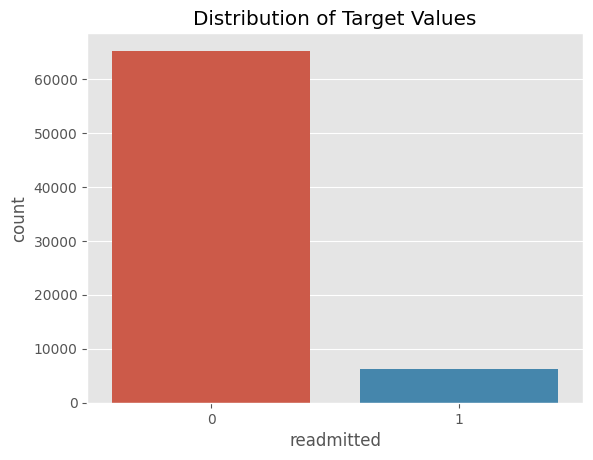

In [ ]:
print(df.readmitted.value_counts())

sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

# # Pie chart
# df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
# plt.title("Proportion of Target Value")
# plt.show()

In [ ]:
#summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=65225 (91.201%)
Class=1, n=6293 (8.799%)


In [ ]:
import smote_variants as v
oversampler= v.OUPS()

X = np.array(X)
y = np.array(y)

# X_samp and y_samp contain the oversampled dataset
Xpbs, ypbs= oversampler.sample(X, y)

2023-12-12 05:39:45,280:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': None}")
INFO:smote_variants:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': None}")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#summarize distribution
counter = Counter(ypbs)
for k,v in counter.items():
 per = v / len(ypbs) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=65225 (50.000%)
Class=1, n=65226 (50.000%)


# Scaling

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(Xpbs, ypbs, test_size=0.3 ,random_state=42)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(Xpbs, ypbs, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Split the training set further for validation

# X_train=X_train.values
# X_test=X_test.values
# y_train=y_train.values
# y_test=y_test.values

# # Standardize the features
# scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.fit_transform(X_val)
# X_train_reshaped=X_train.reshape(X_train.shape[0],X_train.shape[1])
# X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1])
# X_val_reshaped=X_val.reshape(X_val.shape[0],X_val.shape[1])

# *Base* *Layer* final 10

## *MLP(F)*

In [ ]:
# Rest of your code (model definition, compilation, training, and evaluation)
mlp_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=((X_train.shape[1],))),
    layers.Dense(256, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# , validation_split=0.1
mlp_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Model evaluation on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_pred_classes_mlp = (y_pred_mlp > 0.5).astype(int)

mlp_accuracy = accuracy_score(y_test, y_pred_classes_mlp)
mlp_precision = precision_score(y_test, y_pred_classes_mlp, average='macro')
mlp_recall = recall_score(y_test, y_pred_classes_mlp, average='macro')
mlp_f1 = f1_score(y_test, y_pred_classes_mlp, average='macro')
training_accuracy = mlp_model.evaluate(X_train, y_train)
testing_accuracy = mlp_model.evaluate(X_test, y_test)



print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP F1 Score:", mlp_f1)

Epoch 1/10
1305/1305 [==============================] - 15s 10ms/step - loss: 0.5938 - accuracy: 0.6776 - val_loss: 0.5525 - val_accuracy: 0.7106
Epoch 2/10
1305/1305 [==============================] - 13s 10ms/step - loss: 0.5405 - accuracy: 0.7253 - val_loss: 0.5209 - val_accuracy: 0.7448
Epoch 3/10
1305/1305 [==============================] - 14s 11ms/step - loss: 0.5087 - accuracy: 0.7477 - val_loss: 0.5106 - val_accuracy: 0.7480
Epoch 4/10
1305/1305 [==============================] - 14s 11ms/step - loss: 0.4766 - accuracy: 0.7684 - val_loss: 0.4652 - val_accuracy: 0.7755
Epoch 5/10
1305/1305 [==============================] - 17s 13ms/step - loss: 0.4503 - accuracy: 0.7841 - val_loss: 0.4443 - val_accuracy: 0.7952
Epoch 6/10
1305/1305 [==============================] - 12s 9ms/step - loss: 0.4230 - accuracy: 0.8018 - val_loss: 0.4104 - val_accuracy: 0.8093
Epoch 7/10
1305/1305 [==============================] - 13s 10ms/step - loss: 0.3976 - accuracy: 0.8161 - val_loss: 0.3892 - 

## *LeNet(F)*

In [ ]:
def create_lenet(input_dim):
    model = Sequential()
    model.add(Input((input_dim)))
    model.add(Conv1D(3, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(8, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    # model.add(Dropout(0.2))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create LeNet-5 model
lenet_model = create_lenet((X_train.shape[1],1))

lenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lenet_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Make predictions
y_pred = lenet_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
# y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
training_accuracy = lenet_model.evaluate(X_train, y_train)
testing_accuracy = lenet_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.6152 - accuracy: 0.6587 - val_loss: 0.5920 - val_accuracy: 0.6867
Epoch 2/10
1305/1305 [==============================] - 9s 7ms/step - loss: 0.5691 - accuracy: 0.7060 - val_loss: 0.5389 - val_accuracy: 0.7262
Epoch 3/10
1305/1305 [==============================] - 6s 4ms/step - loss: 0.5306 - accuracy: 0.7342 - val_loss: 0.5044 - val_accuracy: 0.7474
Epoch 4/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4926 - accuracy: 0.7603 - val_loss: 0.4843 - val_accuracy: 0.7718
Epoch 5/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4542 - accuracy: 0.7837 - val_loss: 0.4402 - val_accuracy: 0.7971
Epoch 6/10
1305/1305 [==============================] - 6s 4ms/step - loss: 0.4137 - accuracy: 0.8072 - val_loss: 0.3871 - val_accuracy: 0.8261
Epoch 7/10
1305/1305 [==============================] - 9s 7ms/step - loss: 0.3803 - accuracy: 0.8271 - val_loss: 0.3568 - val_accuracy:

## *Alexnet(F)*

In [ ]:
# Define the AlexNet-like model
alx_model = Sequential([
    Input((X_train.shape[1],1)),
    Conv1D(6, kernel_size=5, activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(16, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alx_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
# Model evaluation on the test set
y_pred = alx_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
training_accuracy = alx_model.evaluate(X_train, y_train)
testing_accuracy = alx_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Model Accuracy:", accuracy)
print("Model Precision:", precision)
print("Model Recall:", recall)
print("Model F1 Score:", f1)


Epoch 1/10
1305/1305 [==============================] - 9s 6ms/step - loss: 0.6319 - accuracy: 0.6541 - val_loss: 0.5928 - val_accuracy: 0.6966
Epoch 2/10
1305/1305 [==============================] - 8s 6ms/step - loss: 0.5639 - accuracy: 0.7201 - val_loss: 0.5363 - val_accuracy: 0.7456
Epoch 3/10
1305/1305 [==============================] - 6s 5ms/step - loss: 0.5146 - accuracy: 0.7551 - val_loss: 0.4879 - val_accuracy: 0.7695
Epoch 4/10
1305/1305 [==============================] - 8s 6ms/step - loss: 0.4695 - accuracy: 0.7847 - val_loss: 0.4467 - val_accuracy: 0.8010
Epoch 5/10
1305/1305 [==============================] - 6s 4ms/step - loss: 0.4338 - accuracy: 0.8057 - val_loss: 0.4245 - val_accuracy: 0.8142
Epoch 6/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4070 - accuracy: 0.8201 - val_loss: 0.3879 - val_accuracy: 0.8351
Epoch 7/10
1305/1305 [==============================] - 8s 6ms/step - loss: 0.3859 - accuracy: 0.8325 - val_loss: 0.3708 - val_accuracy:

## *Meta*

In [ ]:
y_pred_mlp_val = mlp_model.predict(X_val)
y_pred_lenet_val = lenet_model.predict(X_val)
y_pred_alx_val = alx_model.predict(X_val)

# Make predictions on the test set using the base models
y_pred_mlp_test = mlp_model.predict(X_test)
y_pred_lenet_test = lenet_model.predict(X_test)
y_pred_alx_test = alx_model.predict(X_test)

816/816 [==============================] - 1s 2ms/step


In [ ]:
# Stacking the predictions for the meta-model
# MLP
stacked_X_val_mlp23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))

# Stacking the predictions for the meta-model on test set
# MLP
stacked_X_test_mlp23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))



## *Final Layer(MLP23)(A+L)(F)*

In [ ]:
# MLP
meta_model = Sequential([
    Dense(512, activation='relu', input_shape=(stacked_X_val_mlp23.shape[1],)),
    Dense(256, activation='relu'),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the meta-model
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the meta-model using the stacked predictions and validation labels
meta_model.fit(stacked_X_val_mlp23, y_val, epochs=10, batch_size=64)


# Get the final predictions using the meta-model
final_predictions = meta_model.predict(stacked_X_test_mlp23)
final_predictions_classes = (final_predictions > 0.5).astype(int)


# Calculate evaluation metrics for the stacked model
accuracy_stacked = accuracy_score(y_test, final_predictions_classes)
precision_stacked = precision_score(y_test, final_predictions_classes, average='macro')
recall_stacked = recall_score(y_test, final_predictions_classes, average='macro')
f1_stacked = f1_score(y_test, final_predictions_classes, average='macro')
training_accuracy = meta_model.evaluate(stacked_X_val_mlp23, y_val)
testing_accuracy = meta_model.evaluate(stacked_X_test_mlp23, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Stacked Model Accuracy:", accuracy_stacked)
print("Stacked Model Precision:", precision_stacked)
print("Stacked Model Recall:", recall_stacked)
print("Stacked Model F1 Score:", f1_stacked)

Epoch 1/10
327/327 [==============================] - 5s 11ms/step - loss: 0.4225 - accuracy: 0.8020
Epoch 2/10
327/327 [==============================] - 5s 14ms/step - loss: 0.3194 - accuracy: 0.8686
Epoch 3/10
327/327 [==============================] - 5s 15ms/step - loss: 0.3103 - accuracy: 0.8733
Epoch 4/10
327/327 [==============================] - 4s 11ms/step - loss: 0.2992 - accuracy: 0.8781
Epoch 5/10
327/327 [==============================] - 3s 8ms/step - loss: 0.3013 - accuracy: 0.8757
Epoch 6/10
327/327 [==============================] - 3s 8ms/step - loss: 0.2955 - accuracy: 0.8801
Epoch 7/10
327/327 [==============================] - 3s 8ms/step - loss: 0.2938 - accuracy: 0.8796
Epoch 8/10
327/327 [==============================] - 4s 12ms/step - loss: 0.2892 - accuracy: 0.8813
Epoch 9/10
327/327 [==============================] - 4s 12ms/step - loss: 0.2856 - accuracy: 0.8827
Epoch 10/10
816/816 [==============================] - 2s 3ms/step - loss: 0.3019 - accuracy: 

# *Base* *Layer* final 10

## *MLP(F)*

In [ ]:
# Rest of your code (model definition, compilation, training, and evaluation)
mlp_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=((X_train.shape[1],))),
    layers.Dense(256, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# , validation_split=0.1
mlp_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Model evaluation on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_pred_classes_mlp = (y_pred_mlp > 0.5).astype(int)

mlp_accuracy = accuracy_score(y_test, y_pred_classes_mlp)
mlp_precision = precision_score(y_test, y_pred_classes_mlp, average='macro')
mlp_recall = recall_score(y_test, y_pred_classes_mlp, average='macro')
mlp_f1 = f1_score(y_test, y_pred_classes_mlp, average='macro')
training_accuracy = mlp_model.evaluate(X_train, y_train)
testing_accuracy = mlp_model.evaluate(X_test, y_test)



print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP F1 Score:", mlp_f1)

Epoch 1/10
1305/1305 [==============================] - 13s 9ms/step - loss: 0.5895 - accuracy: 0.6840 - val_loss: 0.5428 - val_accuracy: 0.7211
Epoch 2/10
1305/1305 [==============================] - 15s 11ms/step - loss: 0.5380 - accuracy: 0.7258 - val_loss: 0.5163 - val_accuracy: 0.7429
Epoch 3/10
1305/1305 [==============================] - 10s 8ms/step - loss: 0.5025 - accuracy: 0.7505 - val_loss: 0.4901 - val_accuracy: 0.7591
Epoch 4/10
1305/1305 [==============================] - 11s 9ms/step - loss: 0.4736 - accuracy: 0.7712 - val_loss: 0.4934 - val_accuracy: 0.7499
Epoch 5/10
1305/1305 [==============================] - 15s 12ms/step - loss: 0.4472 - accuracy: 0.7864 - val_loss: 0.4490 - val_accuracy: 0.7827
Epoch 6/10
1305/1305 [==============================] - 12s 9ms/step - loss: 0.4237 - accuracy: 0.8010 - val_loss: 0.4192 - val_accuracy: 0.8066
Epoch 7/10
1305/1305 [==============================] - 10s 8ms/step - loss: 0.4014 - accuracy: 0.8136 - val_loss: 0.4089 - val_

## *LeNet(F)*

In [ ]:
def create_lenet(input_dim):
    model = Sequential()
    model.add(Input((input_dim)))
    model.add(Conv1D(3, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(8, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    # model.add(Dropout(0.2))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create LeNet-5 model
lenet_model = create_lenet((X_train.shape[1],1))

lenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lenet_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Make predictions
y_pred = lenet_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
# y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
training_accuracy = lenet_model.evaluate(X_train, y_train)
testing_accuracy = lenet_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
1305/1305 [==============================] - 9s 5ms/step - loss: 0.6321 - accuracy: 0.6370 - val_loss: 0.6036 - val_accuracy: 0.6700
Epoch 2/10
1305/1305 [==============================] - 9s 7ms/step - loss: 0.5842 - accuracy: 0.6892 - val_loss: 0.5484 - val_accuracy: 0.7238
Epoch 3/10
1305/1305 [==============================] - 6s 5ms/step - loss: 0.5228 - accuracy: 0.7367 - val_loss: 0.5269 - val_accuracy: 0.7229
Epoch 4/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4862 - accuracy: 0.7600 - val_loss: 0.4713 - val_accuracy: 0.7632
Epoch 5/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4594 - accuracy: 0.7747 - val_loss: 0.4402 - val_accuracy: 0.7887
Epoch 6/10
1305/1305 [==============================] - 6s 4ms/step - loss: 0.4318 - accuracy: 0.7906 - val_loss: 0.4281 - val_accuracy: 0.7869
Epoch 7/10
1305/1305 [==============================] - 8s 6ms/step - loss: 0.4156 - accuracy: 0.8006 - val_loss: 0.4090 - val_accuracy:

## *Alexnet(F)*

In [ ]:
# Define the AlexNet-like model
alx_model = Sequential([
    Input((X_train.shape[1],1)),
    Conv1D(6, kernel_size=5, activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(16, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alx_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
# Model evaluation on the test set
y_pred = alx_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
training_accuracy = alx_model.evaluate(X_train, y_train)
testing_accuracy = alx_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Model Accuracy:", accuracy)
print("Model Precision:", precision)
print("Model Recall:", recall)
print("Model F1 Score:", f1)


Epoch 1/10
1305/1305 [==============================] - 9s 6ms/step - loss: 0.6243 - accuracy: 0.6677 - val_loss: 0.5897 - val_accuracy: 0.6978
Epoch 2/10
1305/1305 [==============================] - 6s 5ms/step - loss: 0.5449 - accuracy: 0.7413 - val_loss: 0.5098 - val_accuracy: 0.7673
Epoch 3/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4967 - accuracy: 0.7714 - val_loss: 0.4714 - val_accuracy: 0.7883
Epoch 4/10
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4650 - accuracy: 0.7888 - val_loss: 0.4453 - val_accuracy: 0.8011
Epoch 5/10
1305/1305 [==============================] - 6s 4ms/step - loss: 0.4358 - accuracy: 0.8046 - val_loss: 0.4208 - val_accuracy: 0.8106
Epoch 6/10
1305/1305 [==============================] - 8s 6ms/step - loss: 0.4111 - accuracy: 0.8174 - val_loss: 0.4035 - val_accuracy: 0.8169
Epoch 7/10
1305/1305 [==============================] - 6s 4ms/step - loss: 0.3899 - accuracy: 0.8282 - val_loss: 0.3795 - val_accuracy:

## *Meta*

In [ ]:
y_pred_mlp_val = mlp_model.predict(X_val)
y_pred_lenet_val = lenet_model.predict(X_val)
y_pred_alx_val = alx_model.predict(X_val)
# y_pred_lstm_val = lstm_model.predict(X_val)
# y_pred_dbn_val = dbn_model.predict(X_val)

# Make predictions on the test set using the base models
y_pred_mlp_test = mlp_model.predict(X_test)
y_pred_lenet_test = lenet_model.predict(X_test)
y_pred_alx_test = alx_model.predict(X_test)
# y_pred_lstm_test = lstm_model.predict(X_test)
# y_pred_dbn_test = dbn_model.predict(X_test)

816/816 [==============================] - 2s 2ms/step


In [ ]:
# Stacking the predictions for the meta-model
# MLP
# stacked_X_val_mlp21 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_mlp22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_mlp23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_mlp3 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_mlp4 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# LeNet
# stacked_X_val_lenet21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lenet22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_lenet23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_lenet3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_lenet4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# # AlexNet
# stacked_X_val_alx21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_alx22 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_alx23 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_alx3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_alx4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# LSTM
# stacked_X_val_lstm21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lstm22 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lstm23 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_lstm3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_lstm4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
# DBN
# stacked_X_val_dbn21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_dbn22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_dbn23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_dbn3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(),  y_pred_lenet_val.flatten()))
# stacked_X_val_dbn4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_lenet_val.flatten()))

# Stacking the predictions for the meta-model on test set
# MLP
# stacked_X_test_mlp21 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_mlp22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_mlp23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_mlp3 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_mlp4 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))
# LeNet
# stacked_X_test_lenet21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lenet22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_lenet23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_lenet3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lenet4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))

# # AlexNet
# stacked_X_test_alx21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_alx22 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_alx23 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_alx3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_alx4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))
# LSTM
# stacked_X_test_lstm21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm22 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm23 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_lstm3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# DBN
# stacked_X_test_dbn21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_dbn3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_lenet_test.flatten()))




## *Final Layer(MLP23)(A+L)(F)*

In [ ]:
# MLP
meta_model = Sequential([
    Dense(512, activation='relu', input_shape=(stacked_X_val_mlp23.shape[1],)),
    Dense(256, activation='relu'),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the meta-model
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the meta-model using the stacked predictions and validation labels
meta_model.fit(stacked_X_val_mlp23, y_val, epochs=10, batch_size=64)


# Get the final predictions using the meta-model
final_predictions = meta_model.predict(stacked_X_test_mlp23)
final_predictions_classes = (final_predictions > 0.5).astype(int)


# Calculate evaluation metrics for the stacked model
accuracy_stacked = accuracy_score(y_test, final_predictions_classes)
precision_stacked = precision_score(y_test, final_predictions_classes, average='macro')
recall_stacked = recall_score(y_test, final_predictions_classes, average='macro')
f1_stacked = f1_score(y_test, final_predictions_classes, average='macro')
training_accuracy = meta_model.evaluate(stacked_X_val_mlp23, y_val)
testing_accuracy = meta_model.evaluate(stacked_X_test_mlp23, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Stacked Model Accuracy:", accuracy_stacked)
print("Stacked Model Precision:", precision_stacked)
print("Stacked Model Recall:", recall_stacked)
print("Stacked Model F1 Score:", f1_stacked)

Epoch 1/10
327/327 [==============================] - 4s 7ms/step - loss: 0.4640 - accuracy: 0.7787
Epoch 2/10
327/327 [==============================] - 4s 11ms/step - loss: 0.3397 - accuracy: 0.8546
Epoch 3/10
327/327 [==============================] - 3s 9ms/step - loss: 0.3384 - accuracy: 0.8539
Epoch 4/10
327/327 [==============================] - 2s 6ms/step - loss: 0.3273 - accuracy: 0.8579
Epoch 5/10
327/327 [==============================] - 2s 6ms/step - loss: 0.3219 - accuracy: 0.8607
Epoch 6/10
327/327 [==============================] - 2s 6ms/step - loss: 0.3211 - accuracy: 0.8639
Epoch 7/10
327/327 [==============================] - 2s 6ms/step - loss: 0.3190 - accuracy: 0.8622
Epoch 8/10
327/327 [==============================] - 3s 9ms/step - loss: 0.3117 - accuracy: 0.8645
Epoch 9/10
327/327 [==============================] - 3s 11ms/step - loss: 0.3086 - accuracy: 0.8667
Epoch 10/10
816/816 [==============================] - 2s 2ms/step - loss: 0.3354 - accuracy: 0.86

# *Base* *Layer* final 20

## *MLP(F)*

In [ ]:
# Rest of your code (model definition, compilation, training, and evaluation)
mlp_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=((X_train.shape[1],))),
    layers.Dense(256, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# , validation_split=0.1
mlp_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Model evaluation on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_pred_classes_mlp = (y_pred_mlp > 0.5).astype(int)

mlp_accuracy = accuracy_score(y_test, y_pred_classes_mlp)
mlp_precision = precision_score(y_test, y_pred_classes_mlp, average='macro')
mlp_recall = recall_score(y_test, y_pred_classes_mlp, average='macro')
mlp_f1 = f1_score(y_test, y_pred_classes_mlp, average='macro')
training_accuracy = mlp_model.evaluate(X_train, y_train)
testing_accuracy = mlp_model.evaluate(X_test, y_test)



print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP F1 Score:", mlp_f1)

Epoch 1/20
1305/1305 [==============================] - 13s 9ms/step - loss: 0.5890 - accuracy: 0.6828 - val_loss: 0.5399 - val_accuracy: 0.7279
Epoch 2/20
1305/1305 [==============================] - 12s 9ms/step - loss: 0.5380 - accuracy: 0.7267 - val_loss: 0.5126 - val_accuracy: 0.7452
Epoch 3/20
1305/1305 [==============================] - 10s 8ms/step - loss: 0.5024 - accuracy: 0.7520 - val_loss: 0.4967 - val_accuracy: 0.7601
Epoch 4/20
1305/1305 [==============================] - 13s 10ms/step - loss: 0.4718 - accuracy: 0.7711 - val_loss: 0.4582 - val_accuracy: 0.7791
Epoch 5/20
1305/1305 [==============================] - 11s 9ms/step - loss: 0.4452 - accuracy: 0.7864 - val_loss: 0.4404 - val_accuracy: 0.7864
Epoch 6/20
1305/1305 [==============================] - 12s 9ms/step - loss: 0.4208 - accuracy: 0.8017 - val_loss: 0.4143 - val_accuracy: 0.8082
Epoch 7/20
1305/1305 [==============================] - 10s 8ms/step - loss: 0.4001 - accuracy: 0.8137 - val_loss: 0.4133 - val_a

## *LeNet(F)*

In [ ]:
def create_lenet(input_dim):
    model = Sequential()
    model.add(Input((input_dim)))
    model.add(Conv1D(3, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(8, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    # model.add(Dropout(0.2))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create LeNet-5 model
lenet_model = create_lenet((X_train.shape[1],1))

lenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lenet_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Make predictions
y_pred = lenet_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
# y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
training_accuracy = lenet_model.evaluate(X_train, y_train)
testing_accuracy = lenet_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.6078 - accuracy: 0.6643 - val_loss: 0.5710 - val_accuracy: 0.7031
Epoch 2/20
1305/1305 [==============================] - 8s 6ms/step - loss: 0.5616 - accuracy: 0.7129 - val_loss: 0.5512 - val_accuracy: 0.7260
Epoch 3/20
1305/1305 [==============================] - 5s 4ms/step - loss: 0.5291 - accuracy: 0.7384 - val_loss: 0.4997 - val_accuracy: 0.7612
Epoch 4/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4950 - accuracy: 0.7608 - val_loss: 0.4687 - val_accuracy: 0.7755
Epoch 5/20
1305/1305 [==============================] - 6s 5ms/step - loss: 0.4628 - accuracy: 0.7804 - val_loss: 0.4328 - val_accuracy: 0.8016
Epoch 6/20
1305/1305 [==============================] - 5s 4ms/step - loss: 0.4344 - accuracy: 0.7942 - val_loss: 0.4084 - val_accuracy: 0.8081
Epoch 7/20
1305/1305 [==============================] - 8s 6ms/step - loss: 0.4136 - accuracy: 0.8056 - val_loss: 0.3902 - val_accuracy:

## *Alexnet(F)*

In [ ]:
# Define the AlexNet-like model
alx_model = Sequential([
    Input((X_train.shape[1],1)),
    Conv1D(6, kernel_size=5, activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(16, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alx_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
# Model evaluation on the test set
y_pred = alx_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
training_accuracy = alx_model.evaluate(X_train, y_train)
testing_accuracy = alx_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Model Accuracy:", accuracy)
print("Model Precision:", precision)
print("Model Recall:", recall)
print("Model F1 Score:", f1)


Epoch 1/20
1305/1305 [==============================] - 10s 6ms/step - loss: 0.5970 - accuracy: 0.6776 - val_loss: 0.5604 - val_accuracy: 0.7138
Epoch 2/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.5448 - accuracy: 0.7222 - val_loss: 0.5506 - val_accuracy: 0.7108
Epoch 3/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.5131 - accuracy: 0.7462 - val_loss: 0.4938 - val_accuracy: 0.7632
Epoch 4/20
1305/1305 [==============================] - 6s 5ms/step - loss: 0.4882 - accuracy: 0.7628 - val_loss: 0.4727 - val_accuracy: 0.7767
Epoch 5/20
1305/1305 [==============================] - 8s 6ms/step - loss: 0.4685 - accuracy: 0.7768 - val_loss: 0.4692 - val_accuracy: 0.7712
Epoch 6/20
1305/1305 [==============================] - 6s 5ms/step - loss: 0.4503 - accuracy: 0.7870 - val_loss: 0.4467 - val_accuracy: 0.7952
Epoch 7/20
1305/1305 [==============================] - 7s 6ms/step - loss: 0.4345 - accuracy: 0.7965 - val_loss: 0.4268 - val_accuracy

## *Meta*

In [ ]:
y_pred_mlp_val = mlp_model.predict(X_val)
y_pred_lenet_val = lenet_model.predict(X_val)
y_pred_alx_val = alx_model.predict(X_val)
# y_pred_lstm_val = lstm_model.predict(X_val)
# y_pred_dbn_val = dbn_model.predict(X_val)

# Make predictions on the test set using the base models
y_pred_mlp_test = mlp_model.predict(X_test)
y_pred_lenet_test = lenet_model.predict(X_test)
y_pred_alx_test = alx_model.predict(X_test)
# y_pred_lstm_test = lstm_model.predict(X_test)
# y_pred_dbn_test = dbn_model.predict(X_test)

816/816 [==============================] - 1s 2ms/step


In [ ]:
# Stacking the predictions for the meta-model
# MLP
# stacked_X_val_mlp21 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_mlp22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_mlp23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_mlp3 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_mlp4 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# LeNet
# stacked_X_val_lenet21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lenet22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_lenet23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_lenet3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_lenet4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# # AlexNet
# stacked_X_val_alx21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_alx22 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_alx23 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_alx3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_alx4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# LSTM
# stacked_X_val_lstm21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lstm22 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lstm23 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_lstm3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_lstm4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
# DBN
# stacked_X_val_dbn21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_dbn22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_dbn23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_dbn3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(),  y_pred_lenet_val.flatten()))
# stacked_X_val_dbn4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_lenet_val.flatten()))

# Stacking the predictions for the meta-model on test set
# MLP
# stacked_X_test_mlp21 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_mlp22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_mlp23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_mlp3 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_mlp4 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))
# LeNet
# stacked_X_test_lenet21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lenet22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_lenet23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_lenet3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lenet4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))

# # AlexNet
# stacked_X_test_alx21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_alx22 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_alx23 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_alx3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_alx4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))
# LSTM
# stacked_X_test_lstm21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm22 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm23 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_lstm3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# DBN
# stacked_X_test_dbn21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_dbn3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_lenet_test.flatten()))




## *Final Layer(MLP23)(A+L)(F)*

In [ ]:
# MLP
meta_model = Sequential([
    Dense(512, activation='relu', input_shape=(stacked_X_val_mlp23.shape[1],)),
    Dense(256, activation='relu'),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the meta-model
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the meta-model using the stacked predictions and validation labels
meta_model.fit(stacked_X_val_mlp23, y_val, epochs=20, batch_size=64)


# Get the final predictions using the meta-model
final_predictions = meta_model.predict(stacked_X_test_mlp23)
final_predictions_classes = (final_predictions > 0.5).astype(int)


# Calculate evaluation metrics for the stacked model
accuracy_stacked = accuracy_score(y_test, final_predictions_classes)
precision_stacked = precision_score(y_test, final_predictions_classes, average='macro')
recall_stacked = recall_score(y_test, final_predictions_classes, average='macro')
f1_stacked = f1_score(y_test, final_predictions_classes, average='macro')
training_accuracy = meta_model.evaluate(stacked_X_val_mlp23, y_val)
testing_accuracy = meta_model.evaluate(stacked_X_test_mlp23, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Stacked Model Accuracy:", accuracy_stacked)
print("Stacked Model Precision:", precision_stacked)
print("Stacked Model Recall:", recall_stacked)
print("Stacked Model F1 Score:", f1_stacked)

Epoch 1/20
327/327 [==============================] - 3s 6ms/step - loss: 0.3861 - accuracy: 0.8250
Epoch 2/20
327/327 [==============================] - 3s 11ms/step - loss: 0.2714 - accuracy: 0.8969
Epoch 3/20
327/327 [==============================] - 3s 10ms/step - loss: 0.2633 - accuracy: 0.8995
Epoch 4/20
327/327 [==============================] - 2s 6ms/step - loss: 0.2546 - accuracy: 0.9033
Epoch 5/20
327/327 [==============================] - 2s 6ms/step - loss: 0.2569 - accuracy: 0.9016
Epoch 6/20
327/327 [==============================] - 2s 6ms/step - loss: 0.2511 - accuracy: 0.9059
Epoch 7/20
327/327 [==============================] - 2s 6ms/step - loss: 0.2492 - accuracy: 0.9062
Epoch 8/20
327/327 [==============================] - 3s 8ms/step - loss: 0.2462 - accuracy: 0.9069
Epoch 9/20
327/327 [==============================] - 4s 11ms/step - loss: 0.2467 - accuracy: 0.9057
Epoch 10/20
327/327 [==============================] - 2s 7ms/step - loss: 0.2393 - accuracy: 0.9

# *Base* *Layer* final 30

## *MLP(F)*

In [ ]:
# Rest of your code (model definition, compilation, training, and evaluation)
mlp_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=((X_train.shape[1],))),
    layers.Dense(256, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# , validation_split=0.1
mlp_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

# Model evaluation on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_pred_classes_mlp = (y_pred_mlp > 0.5).astype(int)

mlp_accuracy = accuracy_score(y_test, y_pred_classes_mlp)
mlp_precision = precision_score(y_test, y_pred_classes_mlp, average='macro')
mlp_recall = recall_score(y_test, y_pred_classes_mlp, average='macro')
mlp_f1 = f1_score(y_test, y_pred_classes_mlp, average='macro')
training_accuracy = mlp_model.evaluate(X_train, y_train)
testing_accuracy = mlp_model.evaluate(X_test, y_test)



print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP F1 Score:", mlp_f1)

Epoch 1/30
1305/1305 [==============================] - 13s 9ms/step - loss: 0.5902 - accuracy: 0.6812 - val_loss: 0.5575 - val_accuracy: 0.7122
Epoch 2/30
1305/1305 [==============================] - 10s 8ms/step - loss: 0.5385 - accuracy: 0.7271 - val_loss: 0.5294 - val_accuracy: 0.7317
Epoch 3/30
1305/1305 [==============================] - 10s 8ms/step - loss: 0.5105 - accuracy: 0.7441 - val_loss: 0.4949 - val_accuracy: 0.7534
Epoch 4/30
1305/1305 [==============================] - 11s 9ms/step - loss: 0.4782 - accuracy: 0.7678 - val_loss: 0.4615 - val_accuracy: 0.7779
Epoch 5/30
1305/1305 [==============================] - 10s 7ms/step - loss: 0.4447 - accuracy: 0.7869 - val_loss: 0.4305 - val_accuracy: 0.7993
Epoch 6/30
1305/1305 [==============================] - 11s 8ms/step - loss: 0.4153 - accuracy: 0.8050 - val_loss: 0.4088 - val_accuracy: 0.8120
Epoch 7/30
1305/1305 [==============================] - 12s 9ms/step - loss: 0.3915 - accuracy: 0.8176 - val_loss: 0.3818 - val_ac

## *LeNet(F)*

In [ ]:
def create_lenet(input_dim):
    model = Sequential()
    model.add(Input((input_dim)))
    model.add(Conv1D(3, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(8, kernel_size=5, activation='tanh'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    # model.add(Dropout(0.2))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create LeNet-5 model
lenet_model = create_lenet((X_train.shape[1],1))

lenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lenet_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

# Make predictions
y_pred = lenet_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
# y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
training_accuracy = lenet_model.evaluate(X_train, y_train)
testing_accuracy = lenet_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/30
1305/1305 [==============================] - 8s 5ms/step - loss: 0.6158 - accuracy: 0.6567 - val_loss: 0.5800 - val_accuracy: 0.6970
Epoch 2/30
1305/1305 [==============================] - 7s 5ms/step - loss: 0.5742 - accuracy: 0.7002 - val_loss: 0.5514 - val_accuracy: 0.7200
Epoch 3/30
1305/1305 [==============================] - 6s 5ms/step - loss: 0.5492 - accuracy: 0.7220 - val_loss: 0.5260 - val_accuracy: 0.7402
Epoch 4/30
1305/1305 [==============================] - 13s 10ms/step - loss: 0.5235 - accuracy: 0.7401 - val_loss: 0.5040 - val_accuracy: 0.7521
Epoch 5/30
1305/1305 [==============================] - 7s 6ms/step - loss: 0.5030 - accuracy: 0.7558 - val_loss: 0.4794 - val_accuracy: 0.7720
Epoch 6/30
1305/1305 [==============================] - 6s 5ms/step - loss: 0.4828 - accuracy: 0.7695 - val_loss: 0.4644 - val_accuracy: 0.7810
Epoch 7/30
1305/1305 [==============================] - 6s 5ms/step - loss: 0.4659 - accuracy: 0.7794 - val_loss: 0.4474 - val_accurac

## *Alexnet(F)*

In [ ]:
# Define the AlexNet-like model
alx_model = Sequential([
    Input((X_train.shape[1],1)),
    Conv1D(6, kernel_size=5, activation='tanh'),
    MaxPooling1D(pool_size=2),
    Conv1D(8, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(16, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
alx_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alx_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))
# Model evaluation on the test set
y_pred = alx_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
training_accuracy = alx_model.evaluate(X_train, y_train)
testing_accuracy = alx_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Model Accuracy:", accuracy)
print("Model Precision:", precision)
print("Model Recall:", recall)
print("Model F1 Score:", f1)


Epoch 1/30
1305/1305 [==============================] - 8s 5ms/step - loss: 0.6274 - accuracy: 0.6605 - val_loss: 0.5787 - val_accuracy: 0.7156
Epoch 2/30
1305/1305 [==============================] - 7s 5ms/step - loss: 0.5502 - accuracy: 0.7323 - val_loss: 0.5192 - val_accuracy: 0.7516
Epoch 3/30
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4793 - accuracy: 0.7687 - val_loss: 0.4494 - val_accuracy: 0.7818
Epoch 4/30
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4301 - accuracy: 0.7955 - val_loss: 0.4125 - val_accuracy: 0.8010
Epoch 5/30
1305/1305 [==============================] - 7s 5ms/step - loss: 0.4079 - accuracy: 0.8084 - val_loss: 0.3891 - val_accuracy: 0.8204
Epoch 6/30
1305/1305 [==============================] - 7s 6ms/step - loss: 0.3930 - accuracy: 0.8191 - val_loss: 0.3917 - val_accuracy: 0.8128
Epoch 7/30
1305/1305 [==============================] - 6s 5ms/step - loss: 0.3832 - accuracy: 0.8233 - val_loss: 0.3657 - val_accuracy:

## *Meta*

In [ ]:
y_pred_mlp_val = mlp_model.predict(X_val)
y_pred_lenet_val = lenet_model.predict(X_val)
y_pred_alx_val = alx_model.predict(X_val)
# y_pred_lstm_val = lstm_model.predict(X_val)
# y_pred_dbn_val = dbn_model.predict(X_val)

# Make predictions on the test set using the base models
y_pred_mlp_test = mlp_model.predict(X_test)
y_pred_lenet_test = lenet_model.predict(X_test)
y_pred_alx_test = alx_model.predict(X_test)
# y_pred_lstm_test = lstm_model.predict(X_test)
# y_pred_dbn_test = dbn_model.predict(X_test)

816/816 [==============================] - 3s 4ms/step


In [ ]:
# Stacking the predictions for the meta-model
# MLP
# stacked_X_val_mlp21 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_mlp22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_mlp23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_mlp3 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_mlp4 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# LeNet
# stacked_X_val_lenet21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lenet22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_lenet23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_lenet3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_lenet4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# # AlexNet
# stacked_X_val_alx21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_alx22 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
stacked_X_val_alx23 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_alx3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_alx4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(), y_pred_lstm_val.flatten(), y_pred_dbn_val.flatten()))
# LSTM
# stacked_X_val_lstm21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lstm22 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_dbn_val.flatten()))
# stacked_X_val_lstm23 = np.column_stack((X_val, y_pred_lenet_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_lstm3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(),  y_pred_dbn_val.flatten()))
# stacked_X_val_lstm4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten(), y_pred_alx_val.flatten(), y_pred_dbn_val.flatten()))
# DBN
# stacked_X_val_dbn21 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_dbn22 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_lenet_val.flatten()))
# stacked_X_val_dbn23 = np.column_stack((X_val, y_pred_alx_val.flatten(), y_pred_mlp_val.flatten()))
# stacked_X_val_dbn3 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(),  y_pred_lenet_val.flatten()))
# stacked_X_val_dbn4 = np.column_stack((X_val, y_pred_mlp_val.flatten(), y_pred_alx_val.flatten(), y_pred_lstm_val.flatten(), y_pred_lenet_val.flatten()))

# Stacking the predictions for the meta-model on test set
# MLP
# stacked_X_test_mlp21 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_mlp22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_mlp23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_mlp3 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_mlp4 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))
# LeNet
# stacked_X_test_lenet21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lenet22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_lenet23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_lenet3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lenet4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))

# # AlexNet
# stacked_X_test_alx21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_alx22 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
stacked_X_test_alx23 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_alx3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_alx4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_lstm_test.flatten(), y_pred_dbn_test.flatten()))
# LSTM
# stacked_X_test_lstm21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm22 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm23 = np.column_stack((X_test, y_pred_lenet_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_lstm3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_dbn_test.flatten()))
# stacked_X_test_lstm4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten(), y_pred_alx_test.flatten(), y_pred_dbn_test.flatten()))
# DBN
# stacked_X_test_dbn21 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn22 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn23 = np.column_stack((X_test, y_pred_alx_test.flatten(), y_pred_mlp_test.flatten()))
# stacked_X_test_dbn3 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lenet_test.flatten()))
# stacked_X_test_dbn4 = np.column_stack((X_test, y_pred_mlp_test.flatten(), y_pred_alx_test.flatten(), y_pred_lstm_test.flatten(), y_pred_lenet_test.flatten()))




## *Final Layer(MLP23)(A+L)(F)*

In [ ]:
# MLP
meta_model = Sequential([
    Dense(512, activation='relu', input_shape=(stacked_X_val_mlp23.shape[1],)),
    Dense(256, activation='relu'),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the meta-model
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the meta-model using the stacked predictions and validation labels
meta_model.fit(stacked_X_val_mlp23, y_val, epochs=30, batch_size=64)


# Get the final predictions using the meta-model
final_predictions = meta_model.predict(stacked_X_test_mlp23)
final_predictions_classes = (final_predictions > 0.5).astype(int)


# Calculate evaluation metrics for the stacked model
accuracy_stacked = accuracy_score(y_test, final_predictions_classes)
precision_stacked = precision_score(y_test, final_predictions_classes, average='macro')
recall_stacked = recall_score(y_test, final_predictions_classes, average='macro')
f1_stacked = f1_score(y_test, final_predictions_classes, average='macro')
training_accuracy = meta_model.evaluate(stacked_X_val_mlp23, y_val)
testing_accuracy = meta_model.evaluate(stacked_X_test_mlp23, y_test)

print(f"Testing Accuracy: {testing_accuracy[1] * 100:.4f}%")
print(f"Training Accuracy: {training_accuracy[1] * 100:.4f}%")
print("Stacked Model Accuracy:", accuracy_stacked)
print("Stacked Model Precision:", precision_stacked)
print("Stacked Model Recall:", recall_stacked)
print("Stacked Model F1 Score:", f1_stacked)

Epoch 1/30
327/327 [==============================] - 3s 7ms/step - loss: 0.3970 - accuracy: 0.8208
Epoch 2/30
327/327 [==============================] - 2s 7ms/step - loss: 0.2834 - accuracy: 0.8902
Epoch 3/30
327/327 [==============================] - 3s 10ms/step - loss: 0.2755 - accuracy: 0.8927
Epoch 4/30
327/327 [==============================] - 4s 11ms/step - loss: 0.2722 - accuracy: 0.8922
Epoch 5/30
327/327 [==============================] - 2s 6ms/step - loss: 0.2651 - accuracy: 0.8963
Epoch 6/30
327/327 [==============================] - 2s 7ms/step - loss: 0.2653 - accuracy: 0.8966
Epoch 7/30
327/327 [==============================] - 2s 7ms/step - loss: 0.2605 - accuracy: 0.8984
Epoch 8/30
327/327 [==============================] - 2s 7ms/step - loss: 0.2582 - accuracy: 0.8971
Epoch 9/30
327/327 [==============================] - 3s 9ms/step - loss: 0.2576 - accuracy: 0.8972
Epoch 10/30
327/327 [==============================] - 3s 11ms/step - loss: 0.2541 - accuracy: 0.8

# final_shap


In [ ]:
import shap
import tqdm

# Define the function for the hybrid model prediction
def hybrid_predict(sample_instance):
    return meta_model.predict([sample_instance])

# Create a sample of instances you want to explain
sample_instances = stacked_X_val_mlp23[:1000]
sample_instance= stacked_X_test_mlp23[:1000]  # Change this to the number of instances you want

# Create a background summary using k-means clustering for the training data
background_summary = shap.kmeans(stacked_X_val_mlp23, 8)

# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(sample_instances)) as pbar:
    explainer = shap.KernelExplainer(hybrid_predict, background_summary)
    pbar.update(len(sample_instances))

# Calculate SHAP values for the sample instances
with tqdm.tqdm(total=len(sample_instance)) as pbar:
    shap_values = explainer.shap_values(sample_instance)
    pbar.update(len(sample_instance))

# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want
instance_to_explain = sample_instance[instance_index]

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

527/527 [==============================] - 1s 3ms/step


100%|██████████| 1000/1000 [43:37<00:00,  2.62s/it]


In [ ]:
feature_names = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
                 'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
                 'num_procedures', 'num_medications', 'number_outpatient',
                 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
                 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
                 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
                 'insulin', 'change', 'diabetesMed', 'A', 'B']

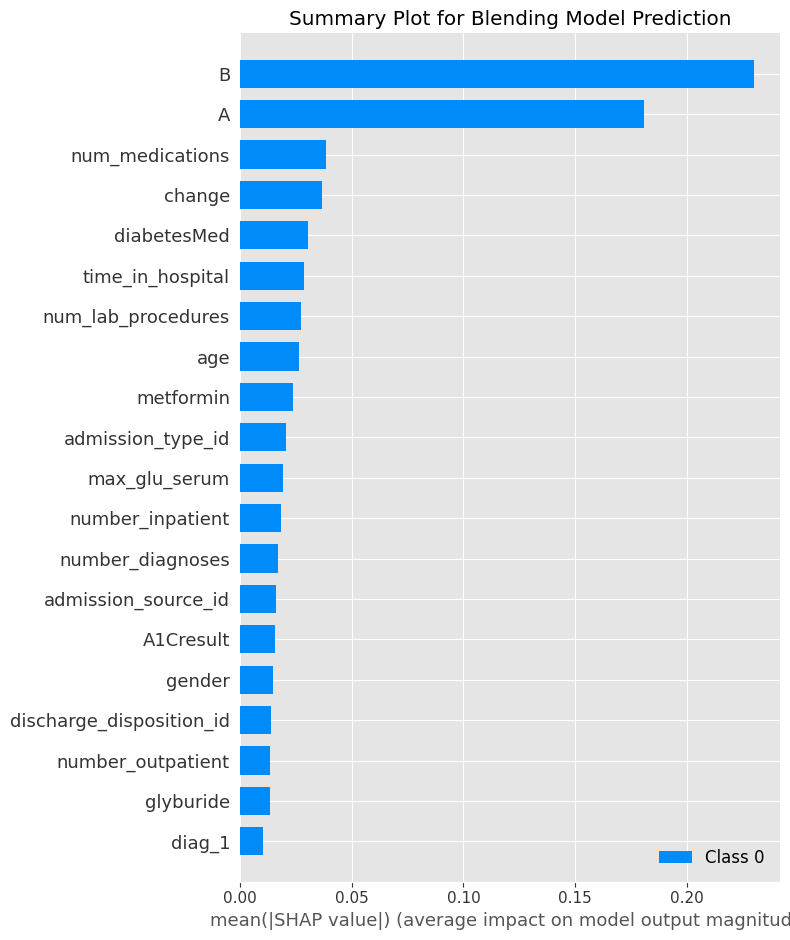

In [ ]:
import matplotlib.pyplot as plt
plt.title('Summary Plot for Blending Model Prediction')
plt.legend(loc='upper left')
plt.tight_layout()
shap.summary_plot(shap_values, sample_instance, plot_type="bar", feature_names=feature_names)
plt.show()

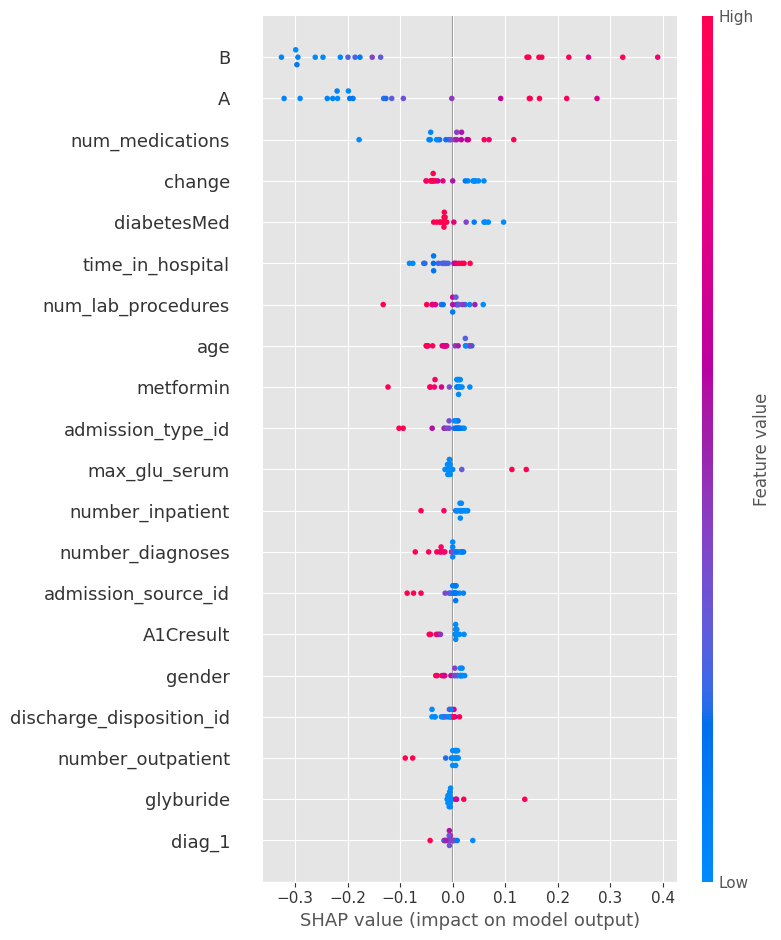

In [ ]:
import shap
import tqdm
import matplotlib.pyplot as plt
if len(shap_values) == 1:
    shap_values = shap_values[0]
instance_index = 0 # Change this to the index of the instance you want

if 0 <= instance_index < len(sample_instance):
    instance_to_explain = sample_instance[instance_index]

    # Display the summary plot for the SHAP values with feature names
    shap.summary_plot(shap_values, sample_instance, feature_names=feature_names)
    plt.show()

else:
    print(f"Error: The instance_index {instance_index} is out of range for sample_instances.")

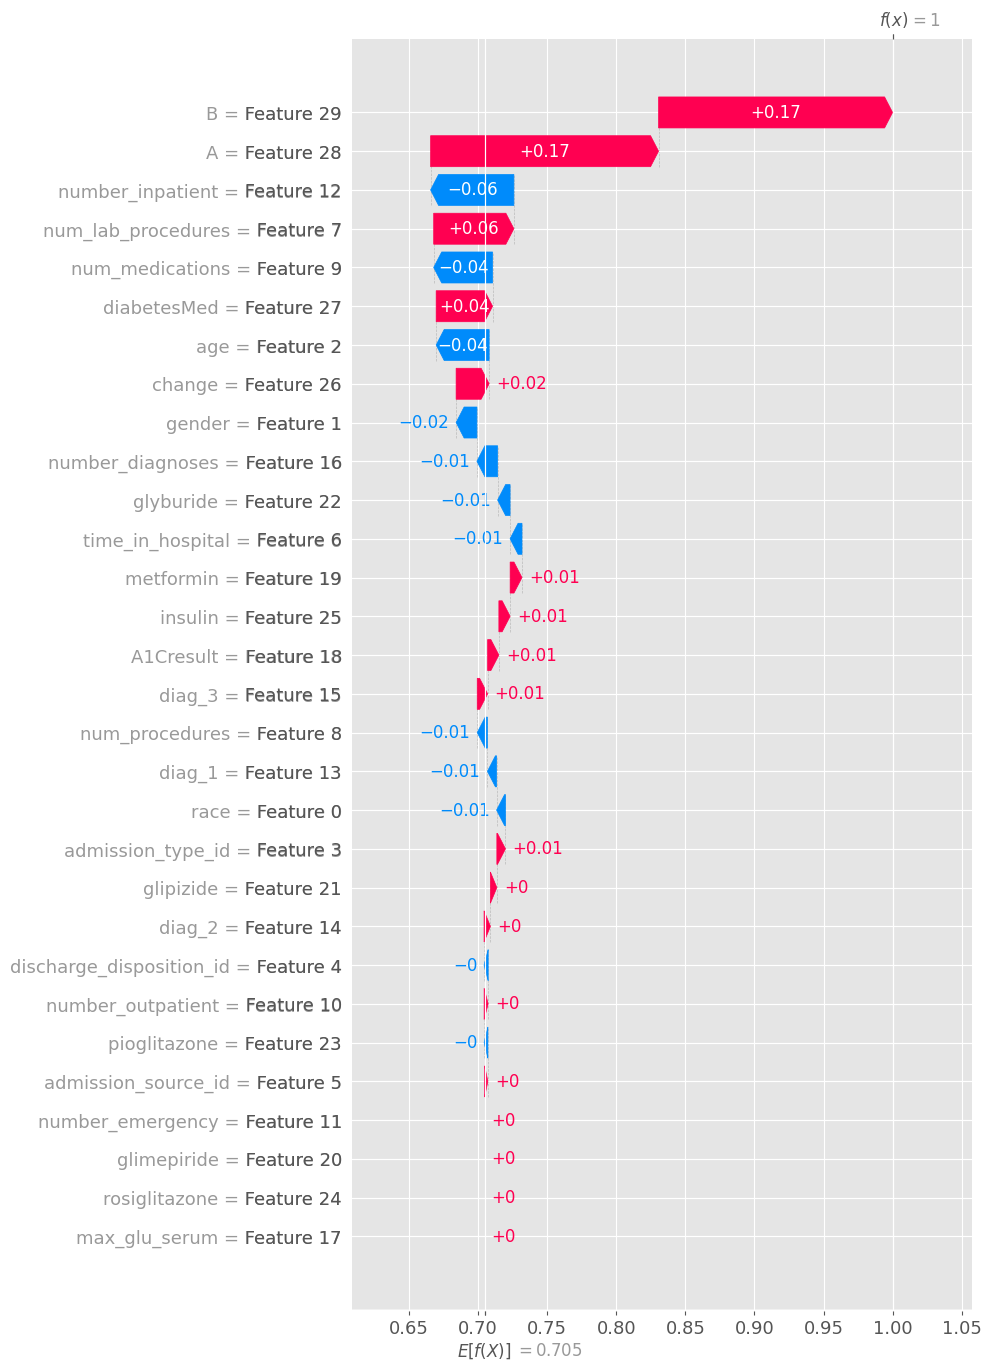

In [ ]:
shap.waterfall_plot (shap.Explanation( values = shap_values [ instance_index ],
base_values = explainer . expected_value ,
data = feature_names) ,
max_display =30)
plt.show ()

# Shap

In [ ]:
import shap
import tqdm
# Create a sample of instances you want to explain
sample_instances = stacked_X_test_mlp23[:10]  # Change this to the number of instances you want

# Create a background summary using k-means clustering for the training data
background_summary = shap.kmeans(stacked_X_val_mlp23, 8)

# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(sample_instances)) as pbar:
    explainer = shap.KernelExplainer(meta_model.predict, background_summary)
    pbar.update(len(sample_instances))

# Calculate SHAP values for the sample instances
with tqdm.tqdm(total=len(sample_instances)) as pbar:
    shap_values = explainer.shap_values(sample_instances)
    pbar.update(len(sample_instances))

# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want
instance_to_explain = sample_instances[instance_index]

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

527/527 [==============================] - 2s 3ms/step


100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


## Plots

In [ ]:
# # Create a sample of instances you want to explain
# sample_instances = X_train[:2000]

# Assuming feature_names is a list of your feature names
feature_names = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
                 'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
                 'num_procedures', 'num_medications', 'number_outpatient',
                 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
                 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
                 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
                 'insulin', 'change', 'diabetesMed', 'A', 'B']

In [ ]:
test = pd.DataFrame(stacked_X_val_mlp23)
test.columns = feature_names

In [ ]:
# Assuming df_X_test is your DataFrame
df_X_test_subset = stacked_X_val_mlp23.iloc[: 10, :]


AttributeError: ignored

In [ ]:
for instance_index, shap_values_output in enumerate(shap_values):  # Assuming shap_values is a list of arrays
    instance_data = X_test[instance_index, :]
    shap.waterfall_plot(shap.Explanation(values=shap_values_output[output_index], base_values=explainer.expected_value[output_index]))

    # Annotate the plot with feature names
    plt.xticks(range(len(feature_names)), feature_names)

    plt.title(f'Waterfall Plot - Output {output_index}, Instance {instance_index}')
    plt.show()

NameError: ignored

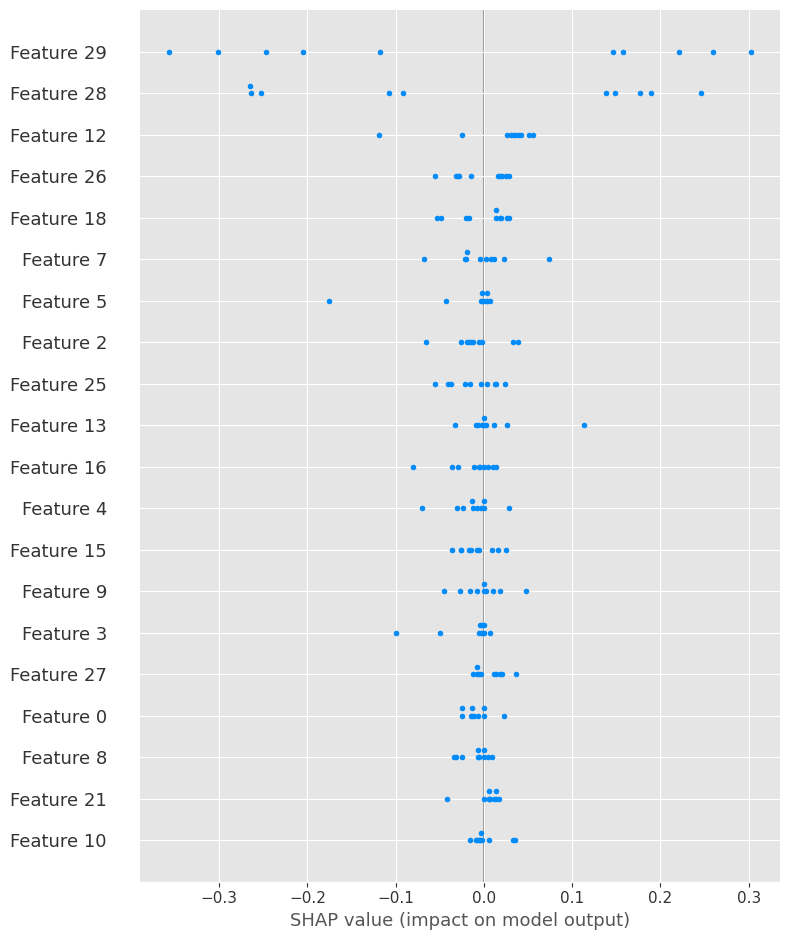

In [ ]:
shap.summary_plot(shap_values)

IndexError: ignored

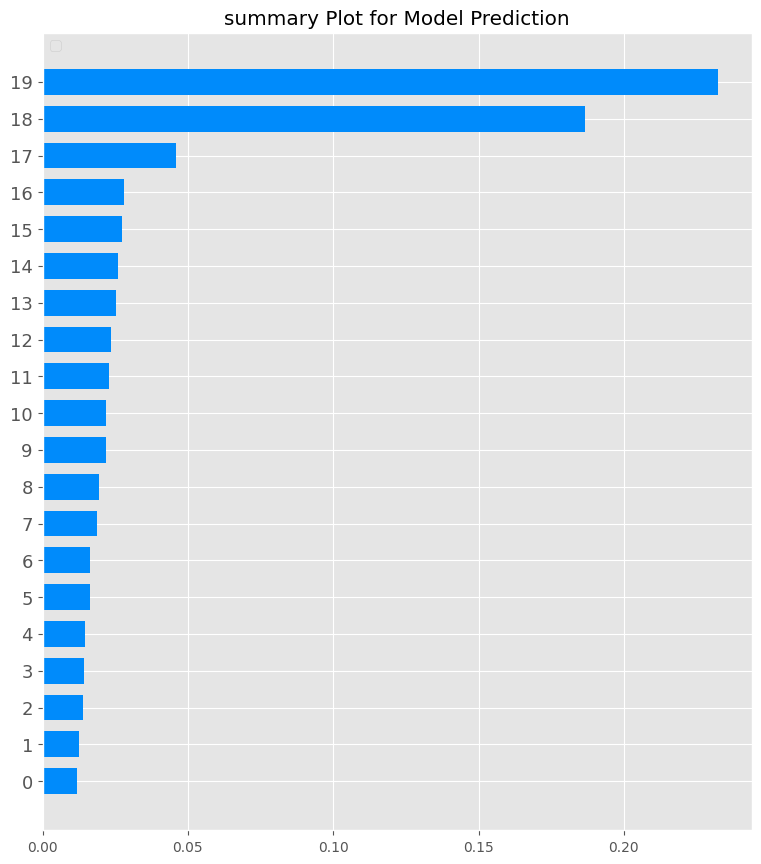

In [ ]:
import shap
import matplotlib.pyplot as plt
plt.title('summary Plot for Model Prediction')
plt.legend(loc='upper left')
plt.tight_layout()
shap.summary_plot(shap_values, stacked_X_val_mlp23, plot_type="bar", feature_names=feature_names, show=False)
plt.show()

IndexError: ignored

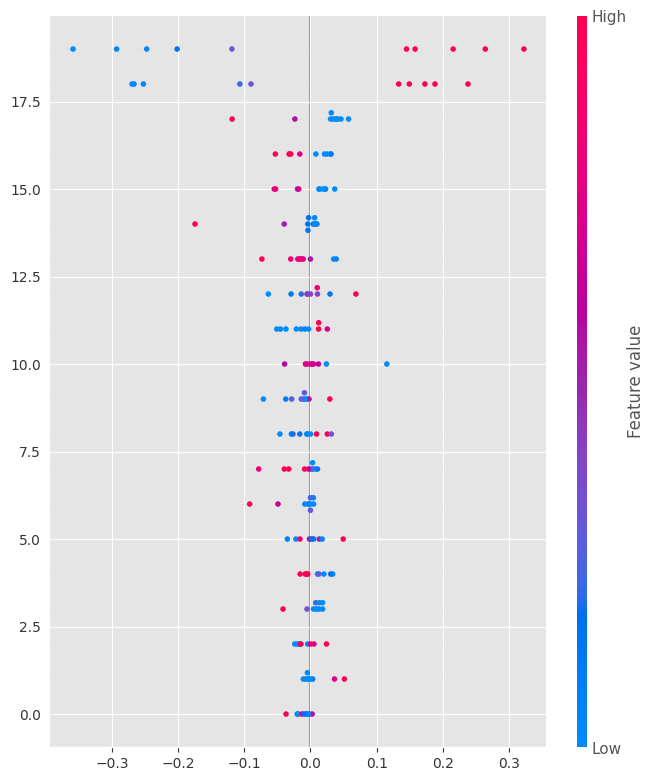

In [ ]:
import shap
import tqdm
import matplotlib.pyplot as plt

# ... (Your previous code for setting up the explainer and calculating SHAP values)

# Ensure that shap_values has the expected shape
if len(shap_values) == 1:
    shap_values = shap_values[0]

# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want

# Check if the instance_index is within the valid range
if 0 <= instance_index < len(sample_instances):
    instance_to_explain = sample_instances[instance_index]

    # Display the summary plot for the SHAP values with feature names
    shap.summary_plot(shap_values, sample_instances, feature_names=feature_names)

    # Create a force plot for the chosen instance
    # shap.force_plot(explainer.expected_value, shap_values[instance_index], instance_to_explain, feature_names=feature_names)
    plt.show()

else:
    print(f"Error: The instance_index {instance_index} is out of range for sample_instances.")


In [ ]:
for instance_index, shap_values_output in enumerate(shap_values):  # Assuming shap_values is a list of arrays
    instance_data = X_test[instance_index, :]
    shap.waterfall_plot(shap.Explanation(values=shap_values_output[output_index], base_values=explainer.expected_value[output_index]))

    # Annotate the plot with feature names
    plt.xticks(range(len(feature_names)), feature_names)

    plt.title(f'Waterfall Plot - Output {output_index}, Instance {instance_index}')
    plt.show()

InvalidIndexError: ignored

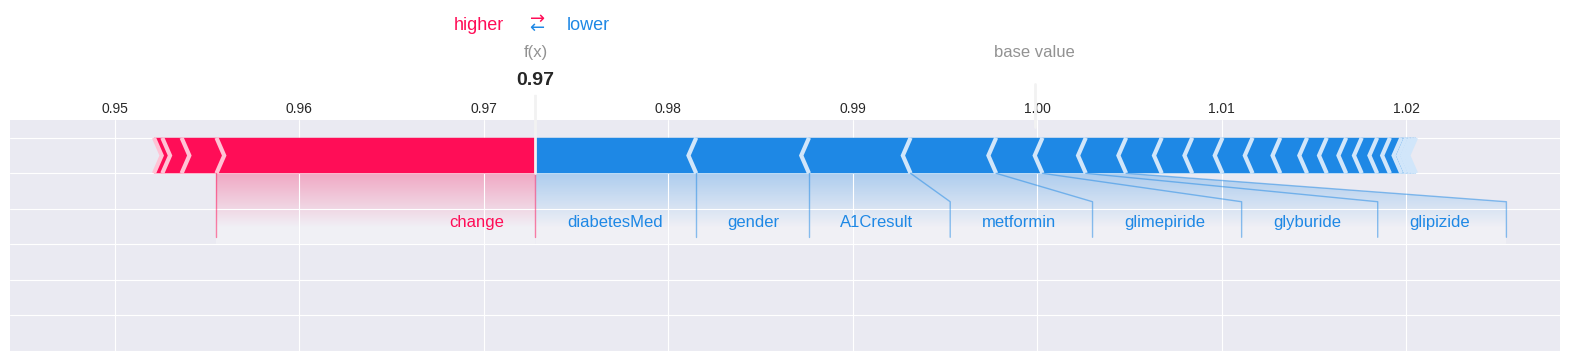

In [ ]:
# Initialize JavaScript visualization ( only needed for Jupyter Notebook )
shap.initjs ()
# Choose the instance for which you want to visualize the force plot
instance_index = 0
shap.force_plot(explainer.expected_value , shap_values [ instance_index ],
feature_names = feature_names , matplotlib = True )
plt.show ()

In [ ]:
test = pd.DataFrame(X_test)
test.columns = feature_names

In [ ]:
# Assuming df_X_test is your DataFrame
df_X_test_subset = test.iloc[:3500, :]


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


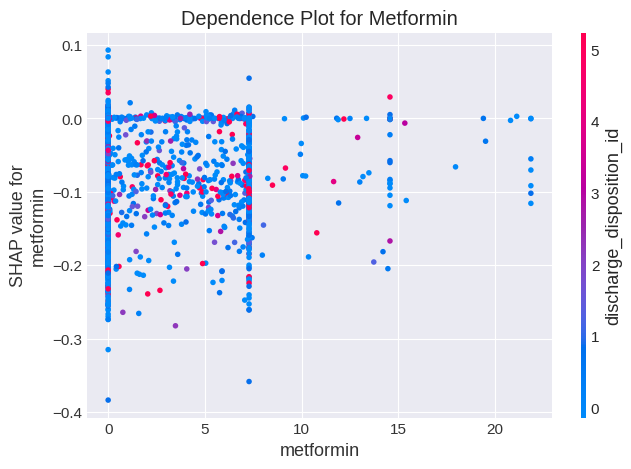

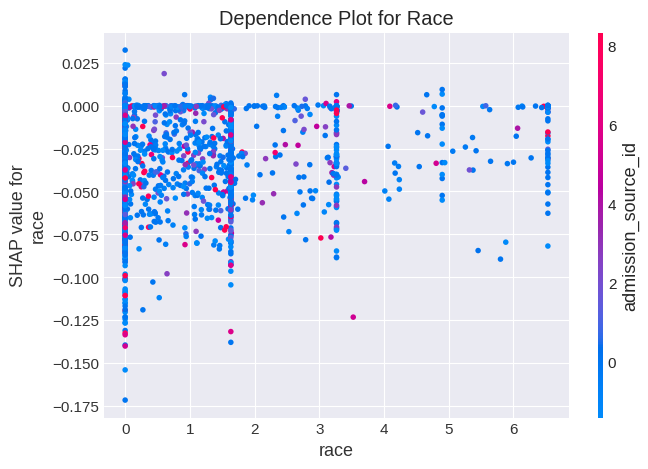

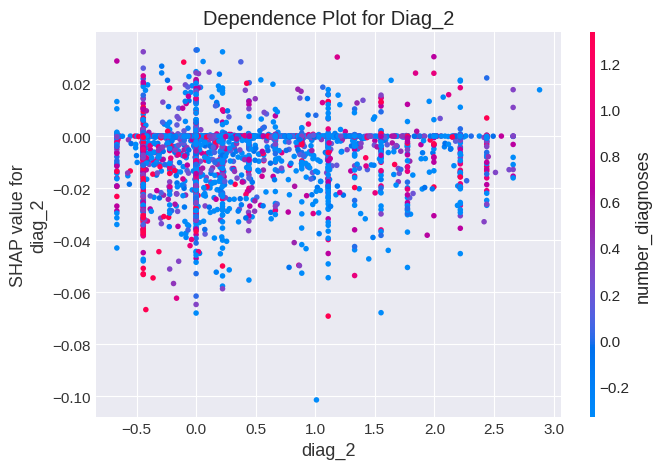

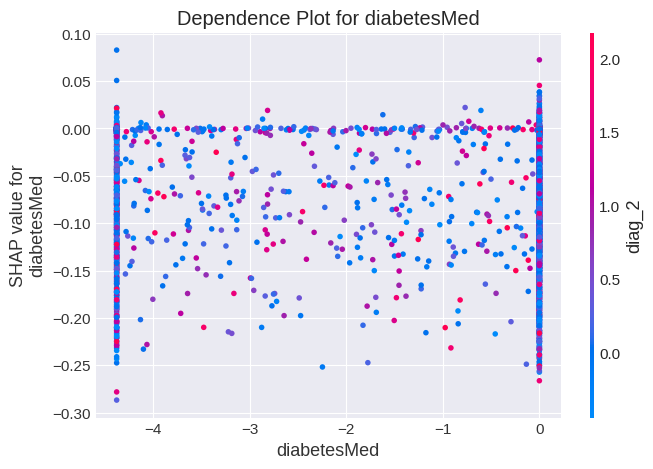

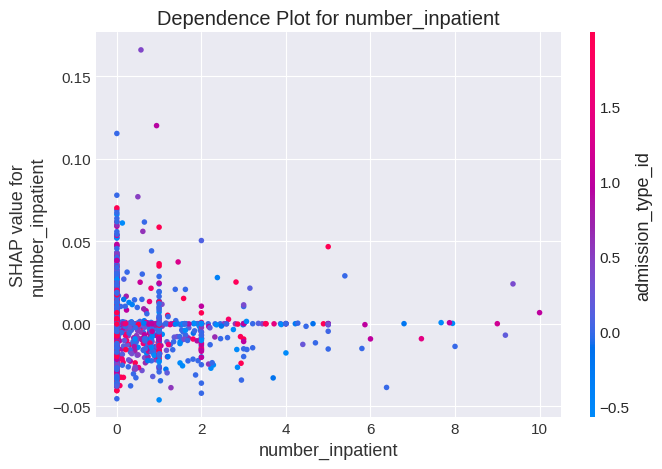

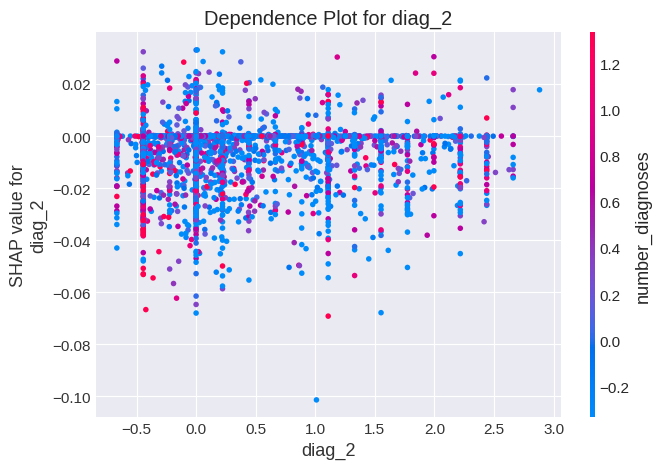

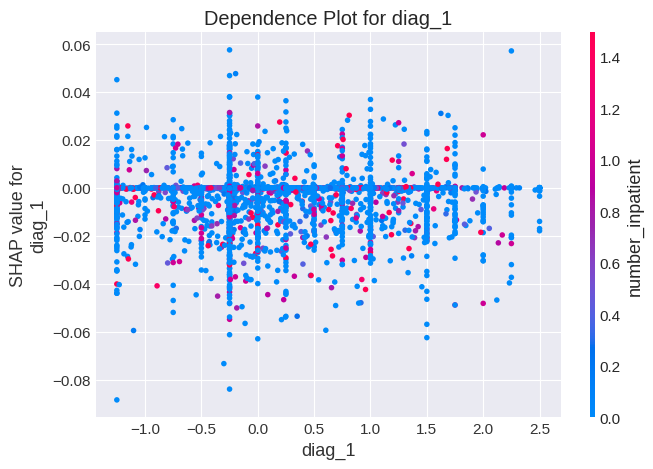

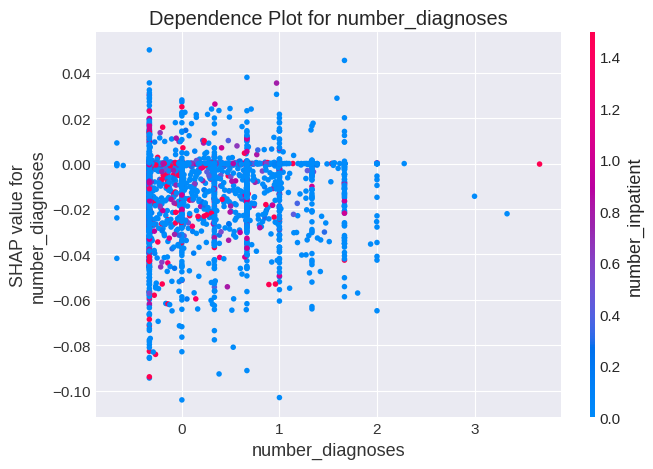

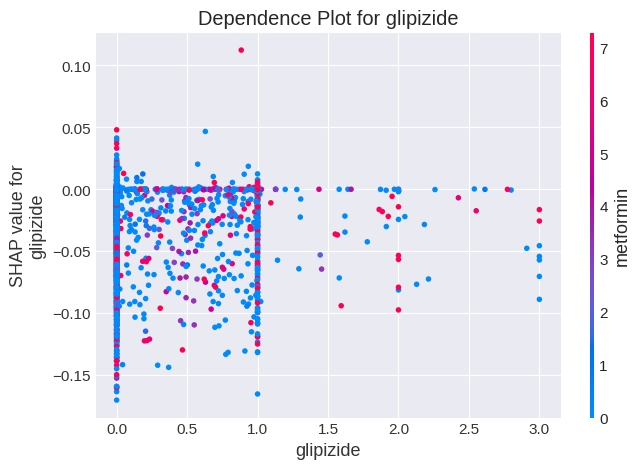

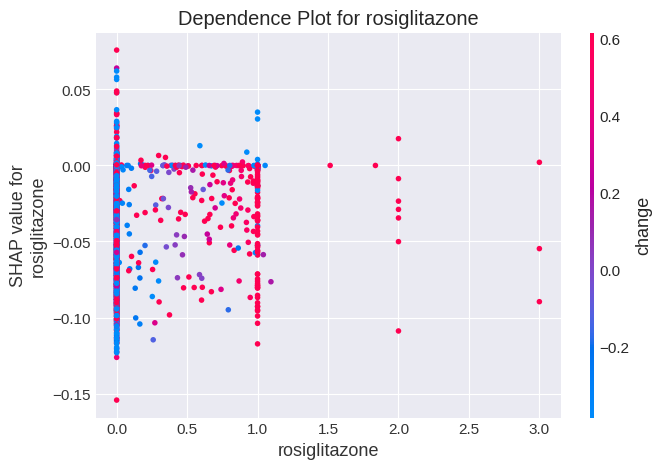

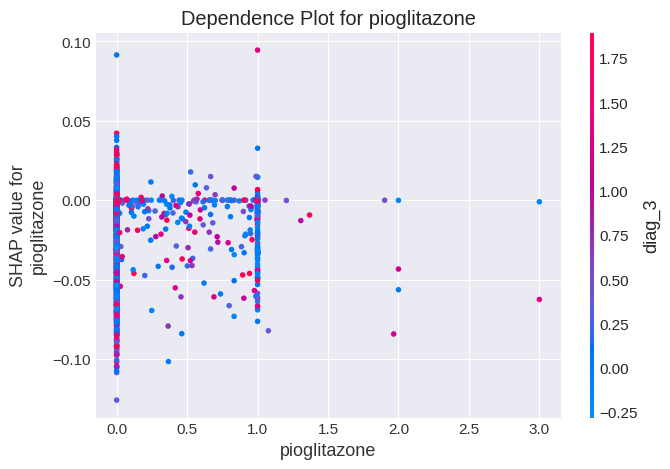

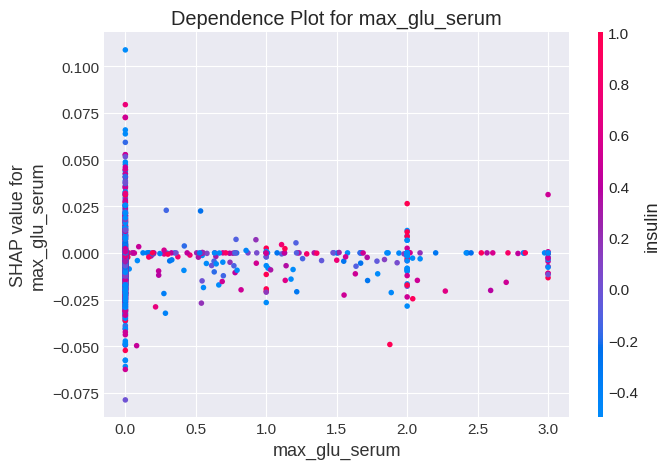

In [ ]:
# Set the style of the plots
plt.style.use('seaborn-darkgrid')

# Create a dependence plot for the 'metformin' feature
shap.dependence_plot('metformin', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for Metformin')
plt.show()

# Create a dependence plot for the 'race' feature
shap.dependence_plot('race', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for Race')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('diag_2', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for Diag_2')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('diabetesMed', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for diabetesMed')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('number_inpatient', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for number_inpatient')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('diag_2', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for diag_2')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('diag_1', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for diag_1')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('number_diagnoses', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for number_diagnoses')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('glipizide', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for glipizide')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('rosiglitazone', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for rosiglitazone')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('pioglitazone', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for pioglitazone')
plt.show()

# Create a dependence plot for the 'diag_2' feature
shap.dependence_plot('max_glu_serum', shap_values, df_X_test_subset, show=False)
plt.title('Dependence Plot for max_glu_serum')
plt.show()


feature_names = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
                 'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
                 'num_procedures', 'num_medications', 'number_outpatient',
                 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
                 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
                 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
                 'insulin', 'change', 'diabetesMed']

# TFC 10

In [ ]:
X_combined= np.concatenate((X_val, X_test), axis=0)
y_combined= np.concatenate((y_val, y_test), axis=0)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Step 1: Train the LSTM model (Base Model)
# Step 4: Train the Inception model (Base Model)

#10 fcv implementation

#import numpy as np

X_train_array = X_combined
y_train_array = y_combined

# Assuming X_train, y_train, X_test are available

n_folds = 10 # Number of folds for cross-validation
n_repeats = 1  # Number of times to repeat the cross-validation
rkf = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []
execution_times = []
for train_index, test_index in rkf.split(X_combined, y_combined):
    X_train_fold, X_test_fold = X_train_array[train_index], X_train_array[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]


    model22 = alx_model.predict(X_train_fold)
    lenet_model1 = lenet_model.predict(X_train_fold)
    X_valid_combined = np.concatenate([X_train_fold, model22, lenet_model1],axis=1)

    # Step 7: Train the MLP meta-model
    model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_valid_combined.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    metrics = ['accuracy']

    model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=metrics)
    model3.fit(X_valid_combined,y_train_fold,epochs=10, batch_size=32)


    # Step 8: Generate final predictions using the stacking model
    final_alx_predictions= alx_model.predict(X_test_fold)
    final_lenet_predictions= lenet_model.predict(X_test_fold)
    X_test_combined = np.concatenate([X_test_fold, final_alx_predictions, final_lenet_predictions],axis=1)
    final_predictions = (model3.predict(X_test_combined) > 0.5).astype("int64")

    hybrid_accuracy = accuracy_score(y_test_fold, final_predictions)
    hybrid_precision = precision_score(y_test_fold, final_predictions)
    hybrid_recall = recall_score(y_test_fold, final_predictions)
    hybrid_f1 = f1_score(y_test_fold, final_predictions)

    accuracies.append(hybrid_accuracy)
    precisions.append(hybrid_precision)
    recalls.append(hybrid_recall)
    f1_scores.append(hybrid_f1)

    # Print evaluation metrics for the hybrid model
    print("Hybrid Model - Accuracy:", hybrid_accuracy)
    print("Hybrid Model - Precision:", hybrid_precision)
    print("Hybrid Model - Recall:", hybrid_recall)
    print("Hybrid Model - F1 Score:", hybrid_f1)
    #print("Hybrid Model - Execution Time:", exe_time)

# Print the average metrics across all folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)
#average_execution_time = np.mean(execution_times)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

1321/1321 [==============================] - 3s 2ms/step
Epoch 1/10
1321/1321 [==============================] - 14s 8ms/step - loss: 0.3879 - accuracy: 0.8271
Epoch 2/10
1321/1321 [==============================] - 11s 8ms/step - loss: 0.3365 - accuracy: 0.8574
Epoch 3/10
1321/1321 [==============================] - 7s 5ms/step - loss: 0.3292 - accuracy: 0.8602
Epoch 4/10
1321/1321 [==============================] - 13s 10ms/step - loss: 0.3241 - accuracy: 0.8630
Epoch 5/10
1321/1321 [==============================] - 12s 9ms/step - loss: 0.3194 - accuracy: 0.8655
Epoch 6/10
1321/1321 [==============================] - 8s 6ms/step - loss: 0.3135 - accuracy: 0.8658
Epoch 7/10
1321/1321 [==============================] - 9s 7ms/step - loss: 0.3109 - accuracy: 0.8682
Epoch 8/10
1321/1321 [==============================] - 8s 6ms/step - loss: 0.3079 - accuracy: 0.8695
Epoch 9/10
1321/1321 [==============================] - 9s 7ms/step - loss: 0.3050 - accuracy: 0.8714
Epoch 10/10
147/147 

# TFC 20

In [ ]:
X_combined= np.concatenate((X_val, X_test), axis=0)
y_combined= np.concatenate((y_val, y_test), axis=0)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Step 1: Train the LSTM model (Base Model)
# Step 4: Train the Inception model (Base Model)

#10 fcv implementation

#import numpy as np

X_train_array = X_combined
y_train_array = y_combined

# Assuming X_train, y_train, X_test are available

n_folds = 10 # Number of folds for cross-validation
n_repeats = 1  # Number of times to repeat the cross-validation
rkf = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []
execution_times = []
for train_index, test_index in rkf.split(X_combined, y_combined):
    X_train_fold, X_test_fold = X_train_array[train_index], X_train_array[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]


    model22 = alx_model.predict(X_train_fold)
    lenet_model1 = lenet_model.predict(X_train_fold)
    X_valid_combined = np.concatenate([X_train_fold, model22, lenet_model1],axis=1)

    # Step 7: Train the MLP meta-model
    model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_valid_combined.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    metrics = ['accuracy']

    model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=metrics)
    model3.fit(X_valid_combined,y_train_fold,epochs=20, batch_size=32)


    # Step 8: Generate final predictions using the stacking model
    final_alx_predictions= alx_model.predict(X_test_fold)
    final_lenet_predictions= lenet_model.predict(X_test_fold)
    X_test_combined = np.concatenate([X_test_fold, final_alx_predictions, final_lenet_predictions],axis=1)
    final_predictions = (model3.predict(X_test_combined) > 0.5).astype("int64")

    hybrid_accuracy = accuracy_score(y_test_fold, final_predictions)
    hybrid_precision = precision_score(y_test_fold, final_predictions)
    hybrid_recall = recall_score(y_test_fold, final_predictions)
    hybrid_f1 = f1_score(y_test_fold, final_predictions)

    accuracies.append(hybrid_accuracy)
    precisions.append(hybrid_precision)
    recalls.append(hybrid_recall)
    f1_scores.append(hybrid_f1)

    # Print evaluation metrics for the hybrid model
    print("Hybrid Model - Accuracy:", hybrid_accuracy)
    print("Hybrid Model - Precision:", hybrid_precision)
    print("Hybrid Model - Recall:", hybrid_recall)
    print("Hybrid Model - F1 Score:", hybrid_f1)
    #print("Hybrid Model - Execution Time:", exe_time)

# Print the average metrics across all folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)
#average_execution_time = np.mean(execution_times)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

1321/1321 [==============================] - 2s 2ms/step
Epoch 1/20
1321/1321 [==============================] - 11s 7ms/step - loss: 0.3909 - accuracy: 0.8234
Epoch 2/20
1321/1321 [==============================] - 7s 6ms/step - loss: 0.3362 - accuracy: 0.8583
Epoch 3/20
1321/1321 [==============================] - 10s 7ms/step - loss: 0.3275 - accuracy: 0.8620
Epoch 4/20
1321/1321 [==============================] - 7s 5ms/step - loss: 0.3227 - accuracy: 0.8626
Epoch 5/20
1321/1321 [==============================] - 10s 7ms/step - loss: 0.3177 - accuracy: 0.8664
Epoch 6/20
1321/1321 [==============================] - 7s 5ms/step - loss: 0.3138 - accuracy: 0.8657
Epoch 7/20
1321/1321 [==============================] - 10s 7ms/step - loss: 0.3110 - accuracy: 0.8683
Epoch 8/20
1321/1321 [==============================] - 7s 5ms/step - loss: 0.3070 - accuracy: 0.8703
Epoch 9/20
1321/1321 [==============================] - 10s 7ms/step - loss: 0.3055 - accuracy: 0.8700
Epoch 10/20
1321/132

# TFC 30

In [ ]:
X_combined= np.concatenate((X_val, X_test), axis=0)
y_combined= np.concatenate((y_val, y_test), axis=0)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Step 1: Train the LSTM model (Base Model)
# Step 4: Train the Inception model (Base Model)

#10 fcv implementation

#import numpy as np

X_train_array = X_combined
y_train_array = y_combined

# Assuming X_train, y_train, X_test are available

n_folds = 10 # Number of folds for cross-validation
n_repeats = 1  # Number of times to repeat the cross-validation
rkf = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []
execution_times = []
for train_index, test_index in rkf.split(X_combined, y_combined):
    X_train_fold, X_test_fold = X_train_array[train_index], X_train_array[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]


    model22 = alx_model.predict(X_train_fold)
    lenet_model1 = lenet_model.predict(X_train_fold)
    X_valid_combined = np.concatenate([X_train_fold, model22, lenet_model1],axis=1)

    # Step 7: Train the MLP meta-model
    model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_valid_combined.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    metrics = ['accuracy']

    model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=metrics)
    model3.fit(X_valid_combined,y_train_fold,epochs=30, batch_size=32)


    # Step 8: Generate final predictions using the stacking model
    final_alx_predictions= alx_model.predict(X_test_fold)
    final_lenet_predictions= lenet_model.predict(X_test_fold)
    X_test_combined = np.concatenate([X_test_fold, final_alx_predictions, final_lenet_predictions],axis=1)
    final_predictions = (model3.predict(X_test_combined) > 0.5).astype("int64")

    hybrid_accuracy = accuracy_score(y_test_fold, final_predictions)
    hybrid_precision = precision_score(y_test_fold, final_predictions)
    hybrid_recall = recall_score(y_test_fold, final_predictions)
    hybrid_f1 = f1_score(y_test_fold, final_predictions)

    accuracies.append(hybrid_accuracy)
    precisions.append(hybrid_precision)
    recalls.append(hybrid_recall)
    f1_scores.append(hybrid_f1)

    # Print evaluation metrics for the hybrid model
    print("Hybrid Model - Accuracy:", hybrid_accuracy)
    print("Hybrid Model - Precision:", hybrid_precision)
    print("Hybrid Model - Recall:", hybrid_recall)
    print("Hybrid Model - F1 Score:", hybrid_f1)
    #print("Hybrid Model - Execution Time:", exe_time)

# Print the average metrics across all folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)
#average_execution_time = np.mean(execution_times)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

1321/1321 [==============================] - 4s 3ms/step
Epoch 1/30
1321/1321 [==============================] - 9s 6ms/step - loss: 0.3908 - accuracy: 0.8259
Epoch 2/30
1321/1321 [==============================] - 11s 8ms/step - loss: 0.3352 - accuracy: 0.8583
Epoch 3/30
1321/1321 [==============================] - 7s 6ms/step - loss: 0.3285 - accuracy: 0.8612
Epoch 4/30
1321/1321 [==============================] - 10s 7ms/step - loss: 0.3225 - accuracy: 0.8646
Epoch 5/30
1321/1321 [==============================] - 7s 6ms/step - loss: 0.3193 - accuracy: 0.8655
Epoch 6/30
1321/1321 [==============================] - 10s 7ms/step - loss: 0.3159 - accuracy: 0.8656
Epoch 7/30
1321/1321 [==============================] - 8s 6ms/step - loss: 0.3111 - accuracy: 0.8687
Epoch 8/30
1321/1321 [==============================] - 10s 8ms/step - loss: 0.3079 - accuracy: 0.8699
Epoch 9/30
1321/1321 [==============================] - 8s 6ms/step - loss: 0.3027 - accuracy: 0.8722
Epoch 10/30
1321/1321